# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Comparative Analysis of Machine Learning Models for Predicting Term Deposit Subscriptions

**Introduction:**
In the competitive banking sector, optimizing marketing strategies is crucial for enhancing profitability and customer engagement. This study evaluated data from a Portuguese bank’s direct marketing campaigns, where phone calls were used to promote term deposits. The goal was to analyze client interactions and campaign outcomes to refine marketing efforts and boost term deposit subscriptions.

We compared four classification models—Logistic Regression (LR), Decision Trees (DT), K-Nearest Neighbors (KNN), and Support Vector Machines (SVM)—to determine which model best predicts term deposit subscriptions. The comparison focused on accuracy, training speed, and ROC-AUC score.

**Objectives:**
Compare LR, DT, KNN, and SVM models based on accuracy, training time, and ROC-AUC score to identify the most effective model for predicting term deposit subscriptions.

**Models Analyzed**

* **Logistic Regression (LR)**
  * **Pros:** Easily interpretable, quick to train, handles imbalanced classes well.
  * **Cons:** May struggle with complex, non-linear patterns without additional feature engineering.
<br>

* **Decision Trees (DT)**
  * **Pros:** Easy to visualize and interpret, can be pruned to manage performance on minority classes, fast training.
  * **Cons:** Risk of overfitting and creating overly complex trees.
<br>

* **K-Nearest Neighbors (KNN)**
  * **Pros:** Simple and easy to implement, effective with imbalanced classes if proper distance metrics and weighting are used.
  * **Cons:** Slow prediction times with large datasets, less interpretable than other models.
<br>

* **Support Vector Machines (SVM)**
  * **Pros:** Effective in high-dimensional spaces, handles class imbalance with appropriate kernels, performs well with complex, non-linear tasks.
  * **Cons:** Computationally intensive and slower with large datasets, harder to interpret due to high-dimensional transformations.<br>
<br>

**Methodology**

**Data Understanding**
* **Data Source:** The dataset `bank-additional-full.csv` from the UCI Machine Learning Repository (ID: 222) includes client demographics, banking information, contact details, and historical campaign data (N = 45,211).
* **Feature and Target Variables:** The dataset was split into features (X) and target labels (y), and then into training and test sets using Python’s `train_test_split`.

  **Variable Description:**
  ```
  Feature Variables:
  1 - age (numeric)
  2 - job (categorical: 'admin.','blue-collar', etc.)
  3 - marital (categorical: 'divorced','married', etc.)
  4 - education (categorical: 'basic.4y','high.school', etc.)
  5 - default (binary: 'no','yes')
  6 - balance (numeric)
  7 - housing (binary: 'no','yes')
  8 - loan (binary: 'no','yes')
  9 - contact (categorical: 'cellular','telephone')
  10 - month (categorical: 'jan', 'feb', etc.)
  11 - day_of_week (categorical: 'mon','tue', etc.) [renamed to; day_of_month] 
  12 - duration (numeric)
  13 - campaign (numeric)
  14 - pdays (numeric; 999 means not previously contacted)
  15 - previous (numeric)
  16 - poutcome (categorical: 'failure','nonexistent','success')
   
  Target Variable:
  17 - y (binary: 'yes','no')
  ```


**Data Preparation and Feature Engineering**

* **Transformations:** Numeric features were standardized or normalized, while categorical features were one-hot encoded. For interpretability, features were reverted to their original scale in the final model. To address class imbalance (5,289 `y='yes'` records vs. 39,922 `y='no'` records), a Case-Control study design was implemented. This involved sampling one record where `y='yes'` for every three records where `y='no'`, resulting in a less sparse dataset of 5,289/21,156 records.

* **Data Cleaning:** Features with high missingness rates, specifically `contact` (26%) and `poutcome` (79.10%), were removed. To ensure the completeness required for statistical modeling, observations with missing values were excluded through listwise deletion. After encoding categorical features, addressing missing values and duplicates, the final dataset comprised 5,021 `y='yes'` records out of N = 17,493 and 35 features.

```
List of columns in the DataFrame:
['age', 'balance', 'day_of_month', 'duration', 'campaign', 'pdays', 'previous', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_married', 'marital_single', 'education_secondary', 'education_tertiary', 'default_yes', 'housing_yes', 'loan_yes', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep']

Shape of preprocessed X: (17493, 35)
Shape of y data: (17493,)
```

* **Interactions and Higher-Order Terms:** Decision Tree was used  to identify important complex interaction features. Higher-order terms were not investigated due to computational and time constraints.

**Model Training and Evaluation**

* **Hyperparameter Tuning:** Explored the following parameter grids:
  * **KNN:** `n_neighbors` values of 3, 5, 7.
  * **Logistic Regression:** `C` values of 0.001, 0.01, 0.1, 1, 10, 100; `Penalty`: l1, l2, none and `Solver`: liblinear.
  * **Decision Tree:** `max_depth` values of None,2, 3, 4, 5, 6,  10, 20; `min_samples_split` values of 2, 5; `min_samples_leaf` values of 1, 2.
  * **SVM:** `C` values of 0.001, 0.01, 0.1, 1, 10, 100; `kernel`: linear, rbf; and `gamma` values of scale, auto, 0.001, 0.01, 0.1, 1, 10.

  Used GridSearchCV with 5-fold cross-validation to optimize hyperparameters and measured training duration with Python’s `time.time()`.e()`.

* **Predictions and Performance Metrics:**
  * **Prediction Scores:** Computed for training and test sets.
  * **Accuracy Scores:** Evaluated for training and test datasets.
  * **Classification Report:** Detailed precision, recall, and F1-score for test sets.
  * **Confusion Matrix:** Visualized model performance.
  * **ROC-AUC Score:** Assessed performance on imbalanced classes.

The final selected model was analyzed to interpret predictors of term deposit subscriptions.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [84]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.svm import SVC
from scipy.stats import norm, chi2
from sklearn.calibration import calibration_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc, log_loss, classification_report

import mglearn
import researchpy as rp 
from sklearn.metrics import precision_score


from sklearn import set_config
set_config(display="diagram") #setting this will display your pipelines as seen above

import warnings
warnings.filterwarnings("ignore")


In [85]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np

# Fetch dataset from UCI Machine Learning Repository
bank_marketing = fetch_ucirepo(id=222)

# Data (as pandas DataFrames)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# Check if y is a DataFrame or Series
if isinstance(y, pd.DataFrame):
    # If y is a DataFrame, extract the first column
    y = y.iloc[:, 0]

# Convert target variable 'y' to numerical values: 'yes' -> 1, 'no' -> 0
y = y.map({'yes': 1, 'no': 0})

# Identify indices for each class
indices_y1 = np.where(y == 1)[0]
indices_y0 = np.where(y == 0)[0]

# Randomly sample 3 records from the majority class for every record in the minority class
selected_indices_y0 = np.random.choice(indices_y0, size=3 * len(indices_y1), replace=True)
selected_indices = np.concatenate([indices_y1, selected_indices_y0])

# Create new DataFrame with selected records
X_selected = X.iloc[selected_indices].reset_index(drop=True)
y_selected = pd.Series(y.iloc[selected_indices].values, name='y')

# Combine features and target variable into a new DataFrame
df_orig = pd.concat([X, y], axis=1)

# Combine selected features and target variable into a new DataFrame
df_new = pd.concat([X_selected, y_selected], axis=1)

# Print shapes of original and selected datasets
print("Shape of original X:", X.shape)
print("Shape of original y:", y.shape)
print("Shape of X_selected:", X_selected.shape)
print("Shape of y_selected:", y_selected.shape)


Shape of original X: (45211, 16)
Shape of original y: (45211,)
Shape of X_selected: (21156, 16)
Shape of y_selected: (21156,)


In [86]:
#df = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep = ';')

In [87]:
df_new.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,59,admin.,married,secondary,no,2343,yes,no,NaN,5,may,1042,1,-1,0,NaN,1
1,56,admin.,married,secondary,no,45,no,no,NaN,5,may,1467,1,-1,0,NaN,1
2,41,technician,married,secondary,no,1270,yes,no,NaN,5,may,1389,1,-1,0,NaN,1
3,55,services,married,secondary,no,2476,yes,no,NaN,5,may,579,1,-1,0,NaN,1
4,54,admin.,married,tertiary,no,184,no,no,NaN,5,may,673,2,-1,0,NaN,1


In [88]:
rp.summary_cat(df_orig['y'])

,Variable,Outcome,Count,Percent
0,y,0,39922,88.3
1,,1,5289,11.7


In [89]:
rp.summary_cat(df_new['y'])

,Variable,Outcome,Count,Percent
0,y,0,15867,75.0
1,,1,5289,25.0


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [90]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21156 entries, 0 to 21155
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          21156 non-null  int64 
 1   job          21024 non-null  object
 2   marital      21156 non-null  object
 3   education    20268 non-null  object
 4   default      21156 non-null  object
 5   balance      21156 non-null  int64 
 6   housing      21156 non-null  object
 7   loan         21156 non-null  object
 8   contact      15628 non-null  object
 9   day_of_week  21156 non-null  int64 
 10  month        21156 non-null  object
 11  duration     21156 non-null  int64 
 12  campaign     21156 non-null  int64 
 13  pdays        21156 non-null  int64 
 14  previous     21156 non-null  int64 
 15  poutcome     4364 non-null   object
 16  y            21156 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 2.7+ MB


In [91]:
df = df_new

In [92]:
# ASSESS MISSINGNESS
# Define the list of columns to check 
vars = df.columns.tolist()

# List to print out columns with more than 10% missing values
selected_vars = []

# Loop over each variable to compute percent missingness
for column_name in vars:
    missing_percentage = (df[column_name].isnull().sum() / len(df)) * 100
    if missing_percentage > 10:
        selected_vars.append(column_name)
        print(f"The percentage of missing values in column '{column_name}' is: {missing_percentage:.2f}%")

# Display the selected columns with more than 10% missing values
print("Columns with more than 10% missing values:")
print(selected_vars)


The percentage of missing values in column 'contact' is: 26.13%
The percentage of missing values in column 'poutcome' is: 79.37%
Columns with more than 10% missing values:
['contact', 'poutcome']


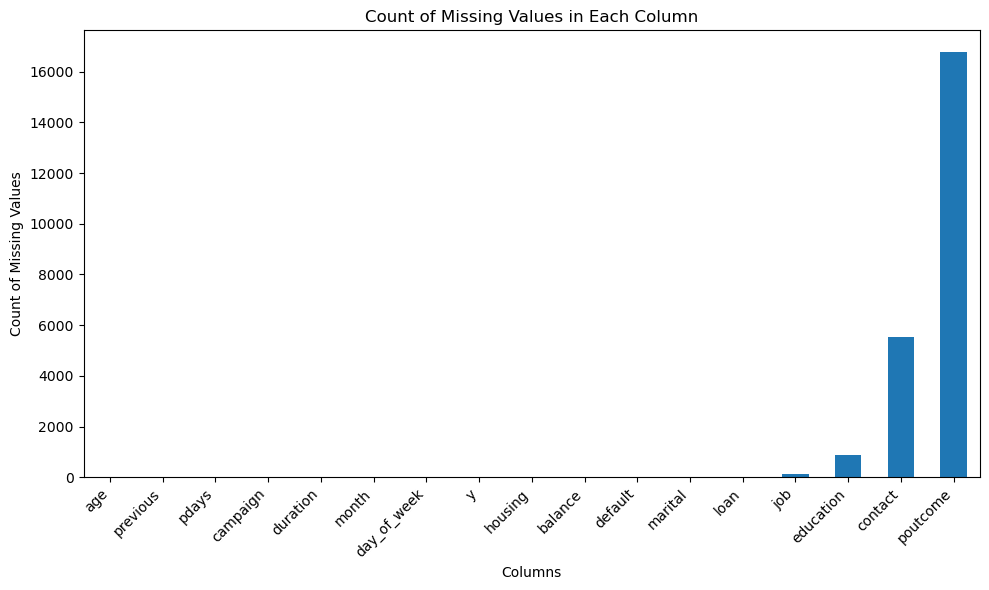

In [93]:
# Check misingness rates 
missing_values_count = df.isnull().sum().sort_values()

plt.figure(figsize=(10, 6))
missing_values_count.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.title('Count of Missing Values in Each Column')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot (optional)
plt.show()

In [94]:
# Drop the columns with more than 10% missing values
df_dropped = df.drop(columns=selected_vars)

# Print the shape of the original and new DataFrame to verify the change
print("Shape of original DataFrame:", df.shape)
print("Shape of DataFrame after dropping columns:", df_dropped.shape)

Shape of original DataFrame: (21156, 17)
Shape of DataFrame after dropping columns: (21156, 15)


In [95]:
# ASSESS DUPLICATED/REPEATED OBSERVATIONS

# Identify duplicated records (keep=False to mark all duplicates)
duplicates = df_dropped[df_dropped.duplicated(keep=False)]

# Count the number of duplicated records
num_duplicates = duplicates.shape[0]

# Display the count of duplicated records
print(f"Number of duplicated records: {num_duplicates}")

# Display duplicate records (optional, to inspect them)
print("Duplicate records:")
print(duplicates)

# Drop duplicate records from the DataFrame
df_dropped_deduped = df_dropped.drop_duplicates()

# Print the shape of the original and new DataFrame to verify the change
print("Shape of original DataFrame:", df_dropped.shape)
print("Shape of DataFrame after dropping duplicates:", df_dropped_deduped.shape)


Number of duplicated records: 5134
Duplicate records:
       age          job  marital  education default  balance housing loan  \
5293    48   technician  married  secondary      no     1600      no   no   
5295    57   management  married  secondary      no       39     yes   no   
5300    57   technician  married  secondary      no     1144     yes   no   
5301    31   management   single   tertiary      no       33      no   no   
5302    45       admin.   single  secondary      no      -88     yes   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
21137   36   technician  married   tertiary      no      473      no   no   
21142   39  blue-collar  married    primary      no      264     yes  yes   
21145   43   management  married   tertiary      no     2450      no  yes   
21151   38  blue-collar  married  secondary      no       22     yes  yes   
21155   59       admin.  married  secondary      no     6264      no   no   

       day_of_week mo

In [96]:
rp.summary_cat(df_dropped_deduped['y'])

,Variable,Outcome,Count,Percent
0,y,0,13132,71.29
1,,1,5289,28.71


In [97]:
# listwise deletion of records with NaN. 

# Check for records with any NaN values
records_with_nan = df_dropped_deduped[df_dropped_deduped.isna().any(axis=1)]

# Display the count of records with NaN values
num_records_with_nan = records_with_nan.shape[0]
print(f"Number of records with NaN values: {num_records_with_nan}")

# Optionally, display records with NaN values
print("Records with NaN values:")
print(records_with_nan)

# Drop records with any NaN values
df_cleaned = df_dropped_deduped.dropna()

# Print the shape of the DataFrame before and after dropping records with NaN values
print("Shape of original DataFrame:", df_dropped_deduped.shape)
print("Shape of DataFrame after dropping records with NaN values:", df_cleaned.shape)


Number of records with NaN values: 848
Records with NaN values:
       age            job  marital  education default  balance housing loan  \
8       39     technician   single        NaN      no    45248     yes   no   
59      52     management  married        NaN      no     2240     yes   no   
75      40     technician   single        NaN      no     3652     yes   no   
82      43  self-employed   single        NaN      no     3173      no   no   
84      44    blue-collar  married        NaN      no      146     yes   no   
...    ...            ...      ...        ...     ...      ...     ...  ...   
20871   20        student   single        NaN      no      179      no   no   
20949   35    blue-collar   single        NaN      no       88      no   no   
20968   41     management  married        NaN      no      944      no   no   
21091   42         admin.  married        NaN      no      756      no   no   
21115   39            NaN   single  secondary      no      914     

In [98]:
rp.summary_cat(df_cleaned['y'])

,Variable,Outcome,Count,Percent
0,y,0,12552,71.43
1,,1,5021,28.57


In [99]:
#df_cleaned.info()

# Visualize the data

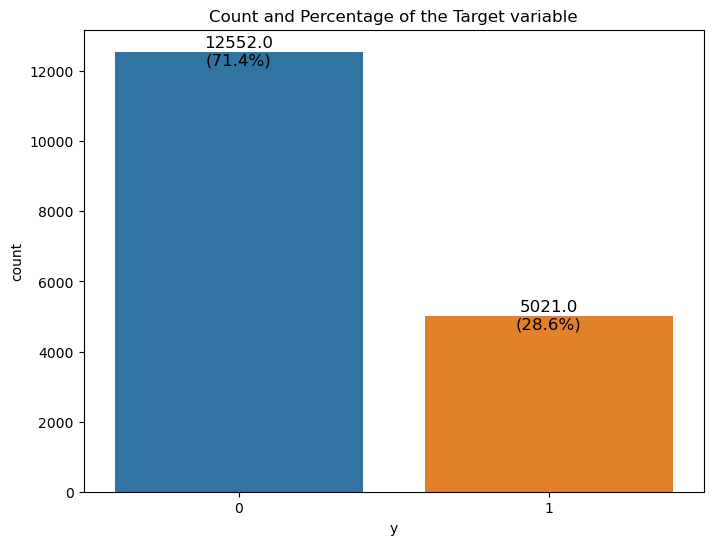

In [100]:
# Create a count plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_cleaned, x='y')

# Add counts and percentages inside each bar
total = len(df_cleaned['y'])
for p in ax.patches:
    count = p.get_height()
    percentage = '{:.1f}%'.format(100 * count / total)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(f'{count}\n({percentage})', 
                (x, y), 
                ha='center', va='center', fontsize=12, color='black')

plt.title('Count and Percentage of the Target variable')
plt.show()

In [101]:
df_plot = df_cleaned

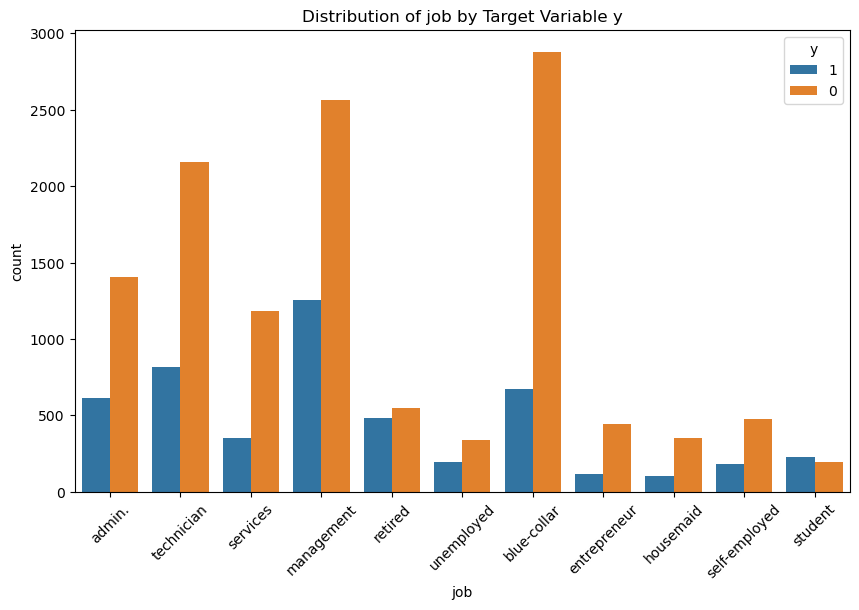

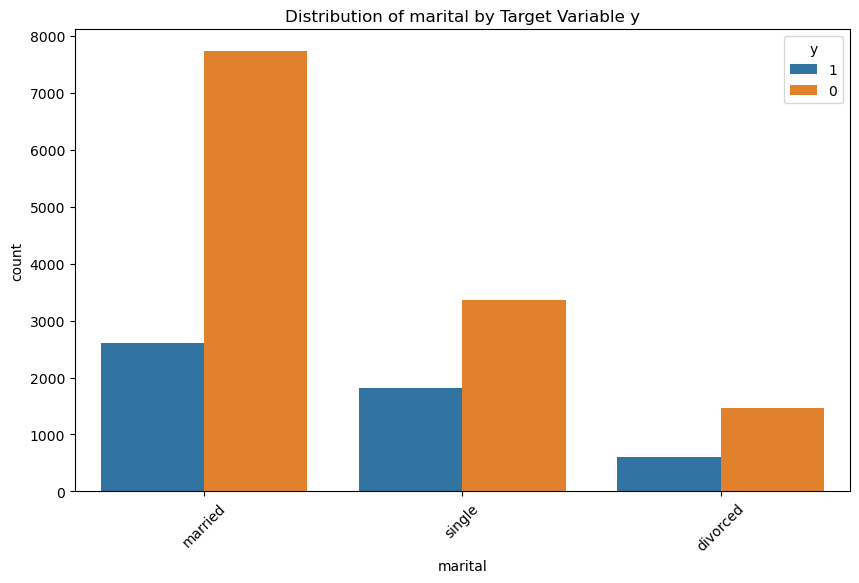

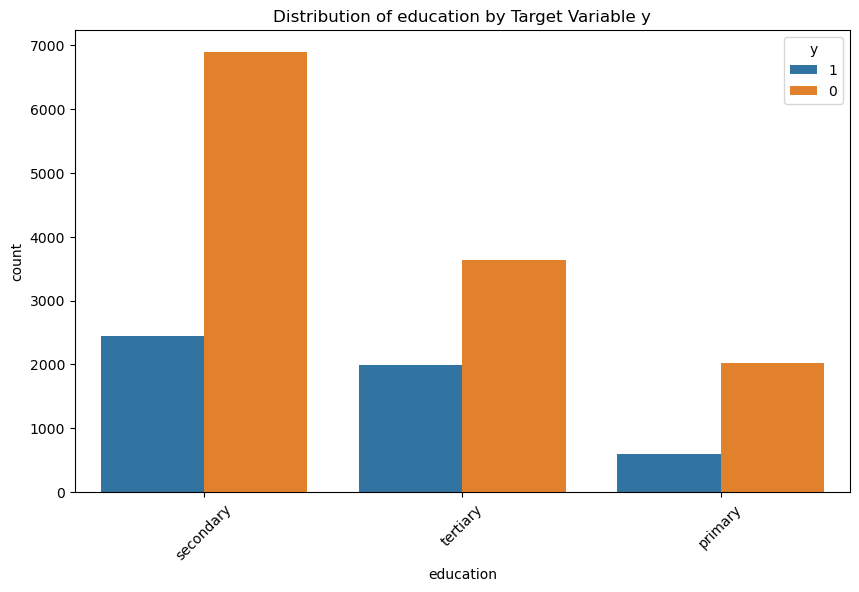

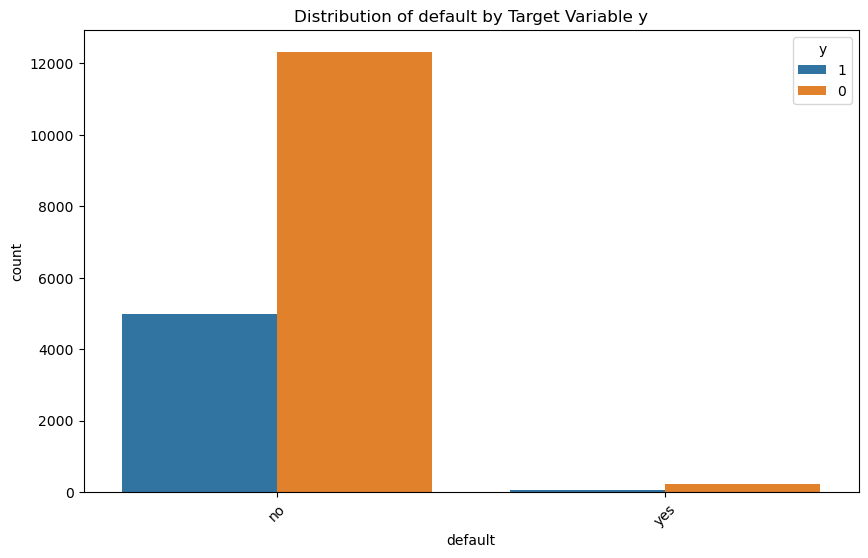

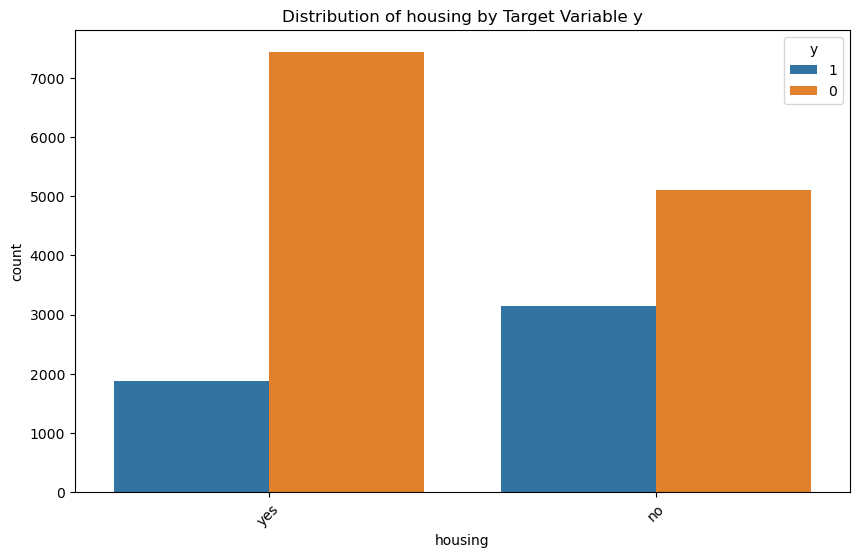

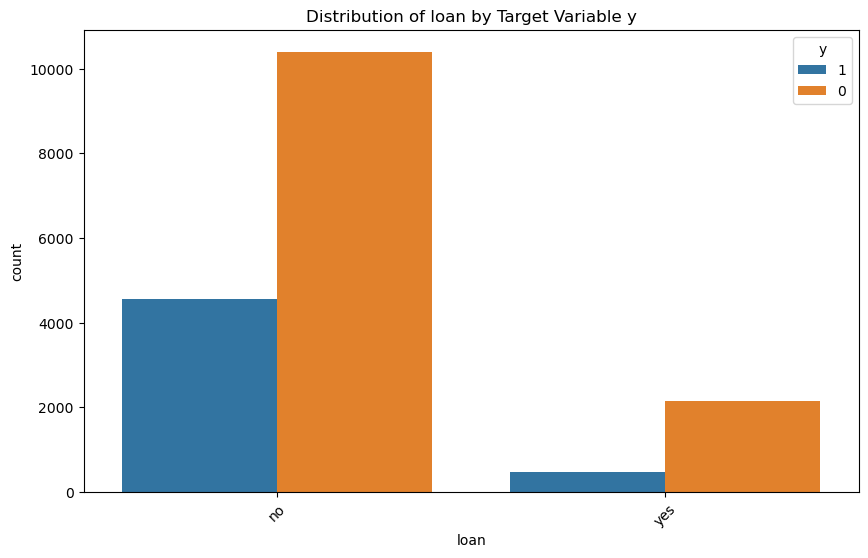

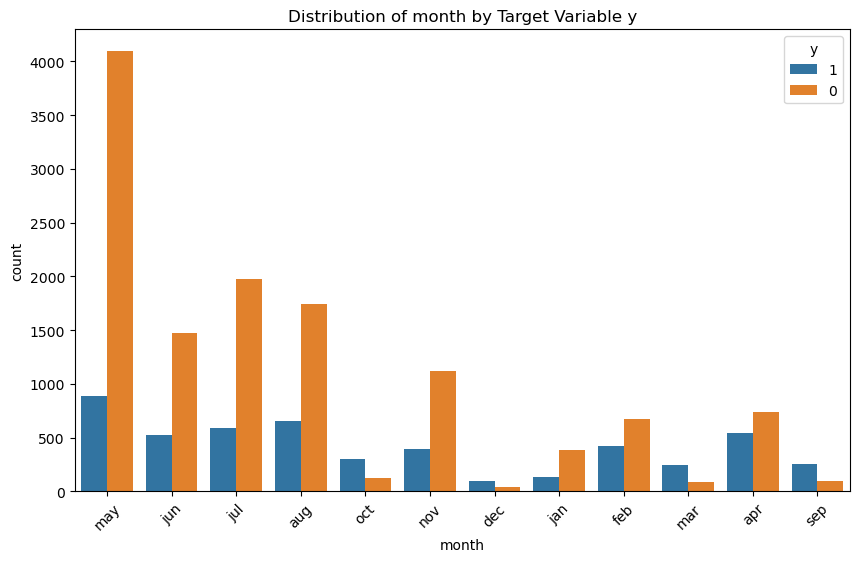

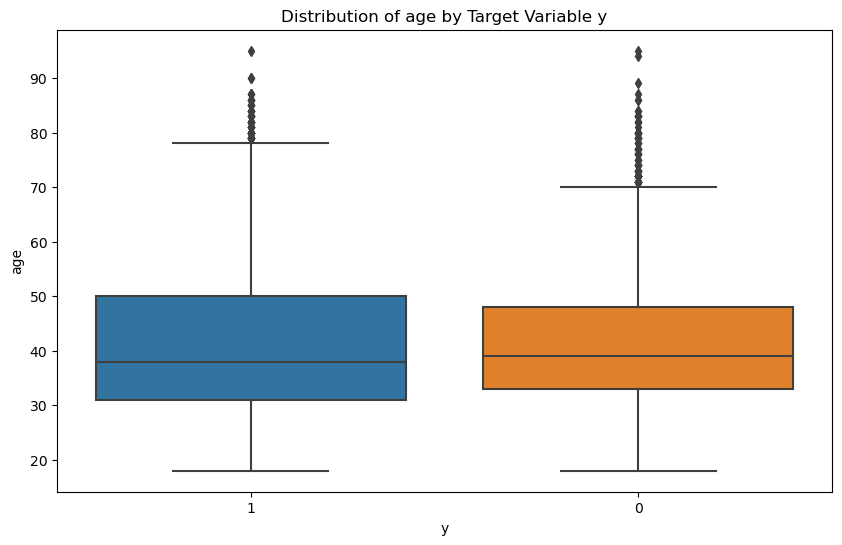

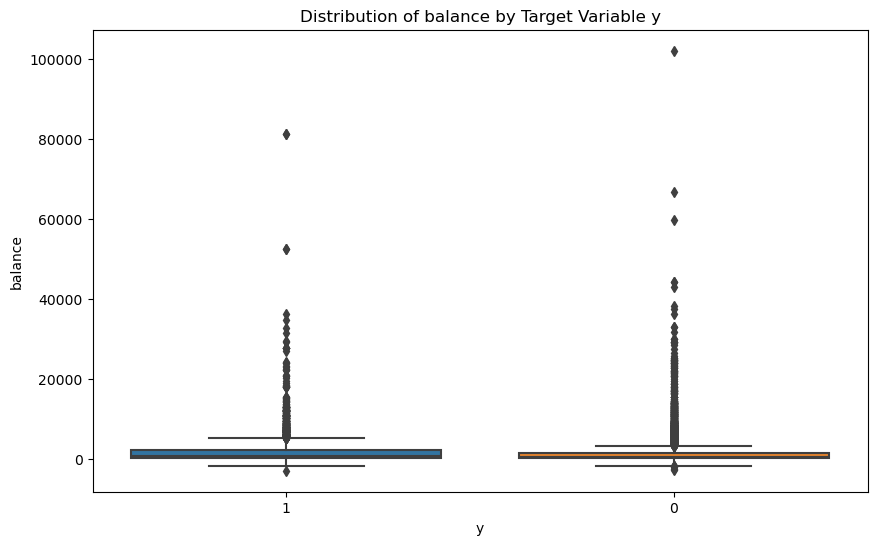

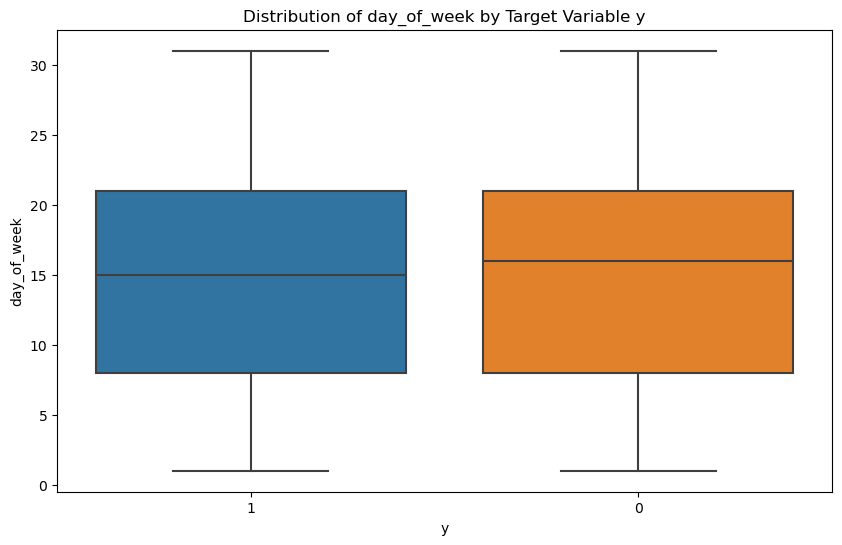

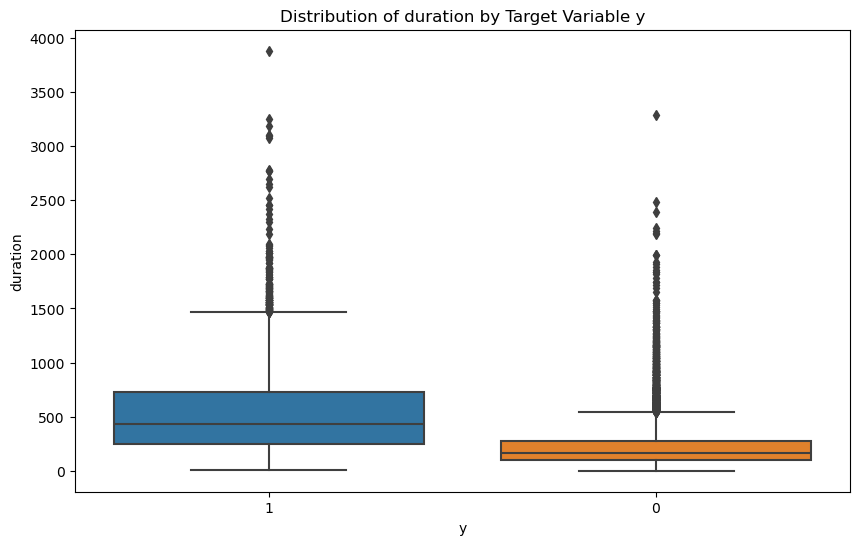

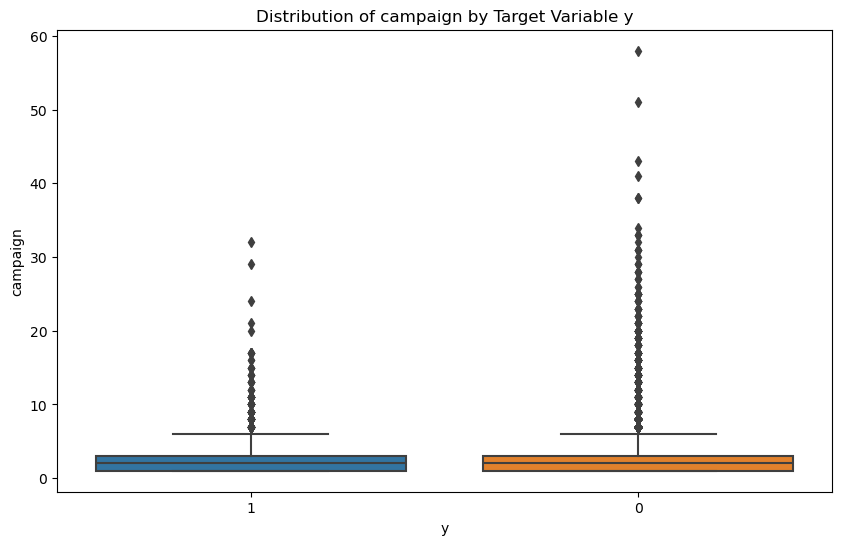

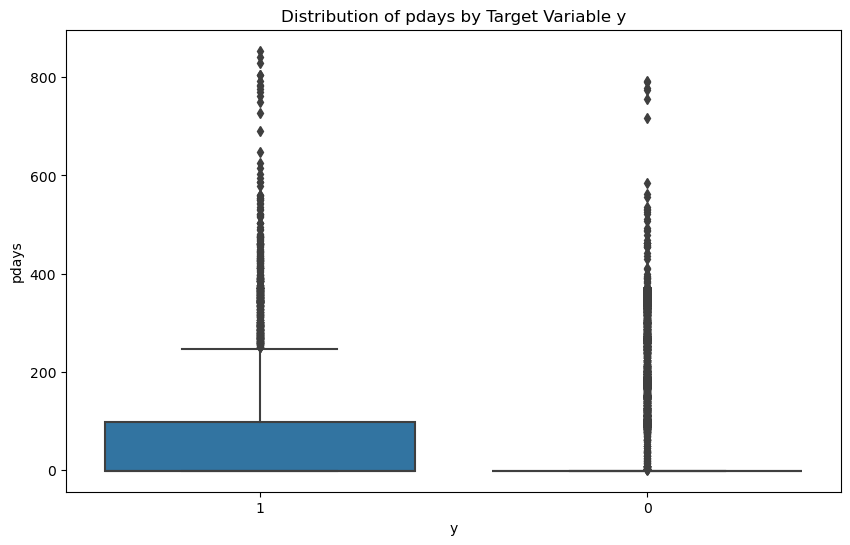

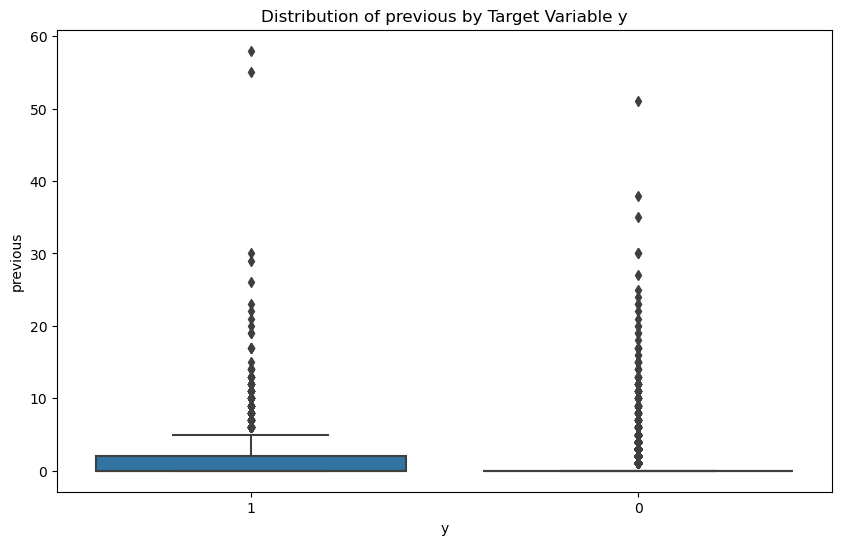

In [102]:
# EXPLORATORY DATA ANALYSIS

# encode numeric values to strings
df_plot['y'] = df_plot['y'].astype('string')

# Separate features and target variable
X = df_plot.drop(columns='y')
y = df_plot['y']

# Combine X and y for plotting
df_combined = pd.concat([X, y], axis=1)

# Loop through categorical features and plot bar charts
categorical_features = X.select_dtypes(include=['object']).columns

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='y', data=df_plot)
    plt.title(f'Distribution of {feature} by Target Variable y')
    plt.xticks(rotation=45)
    plt.show()

# Loop through numerical features and plot box plots
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='y', y=feature, data=df_plot)
    plt.title(f'Distribution of {feature} by Target Variable y')
    plt.show()

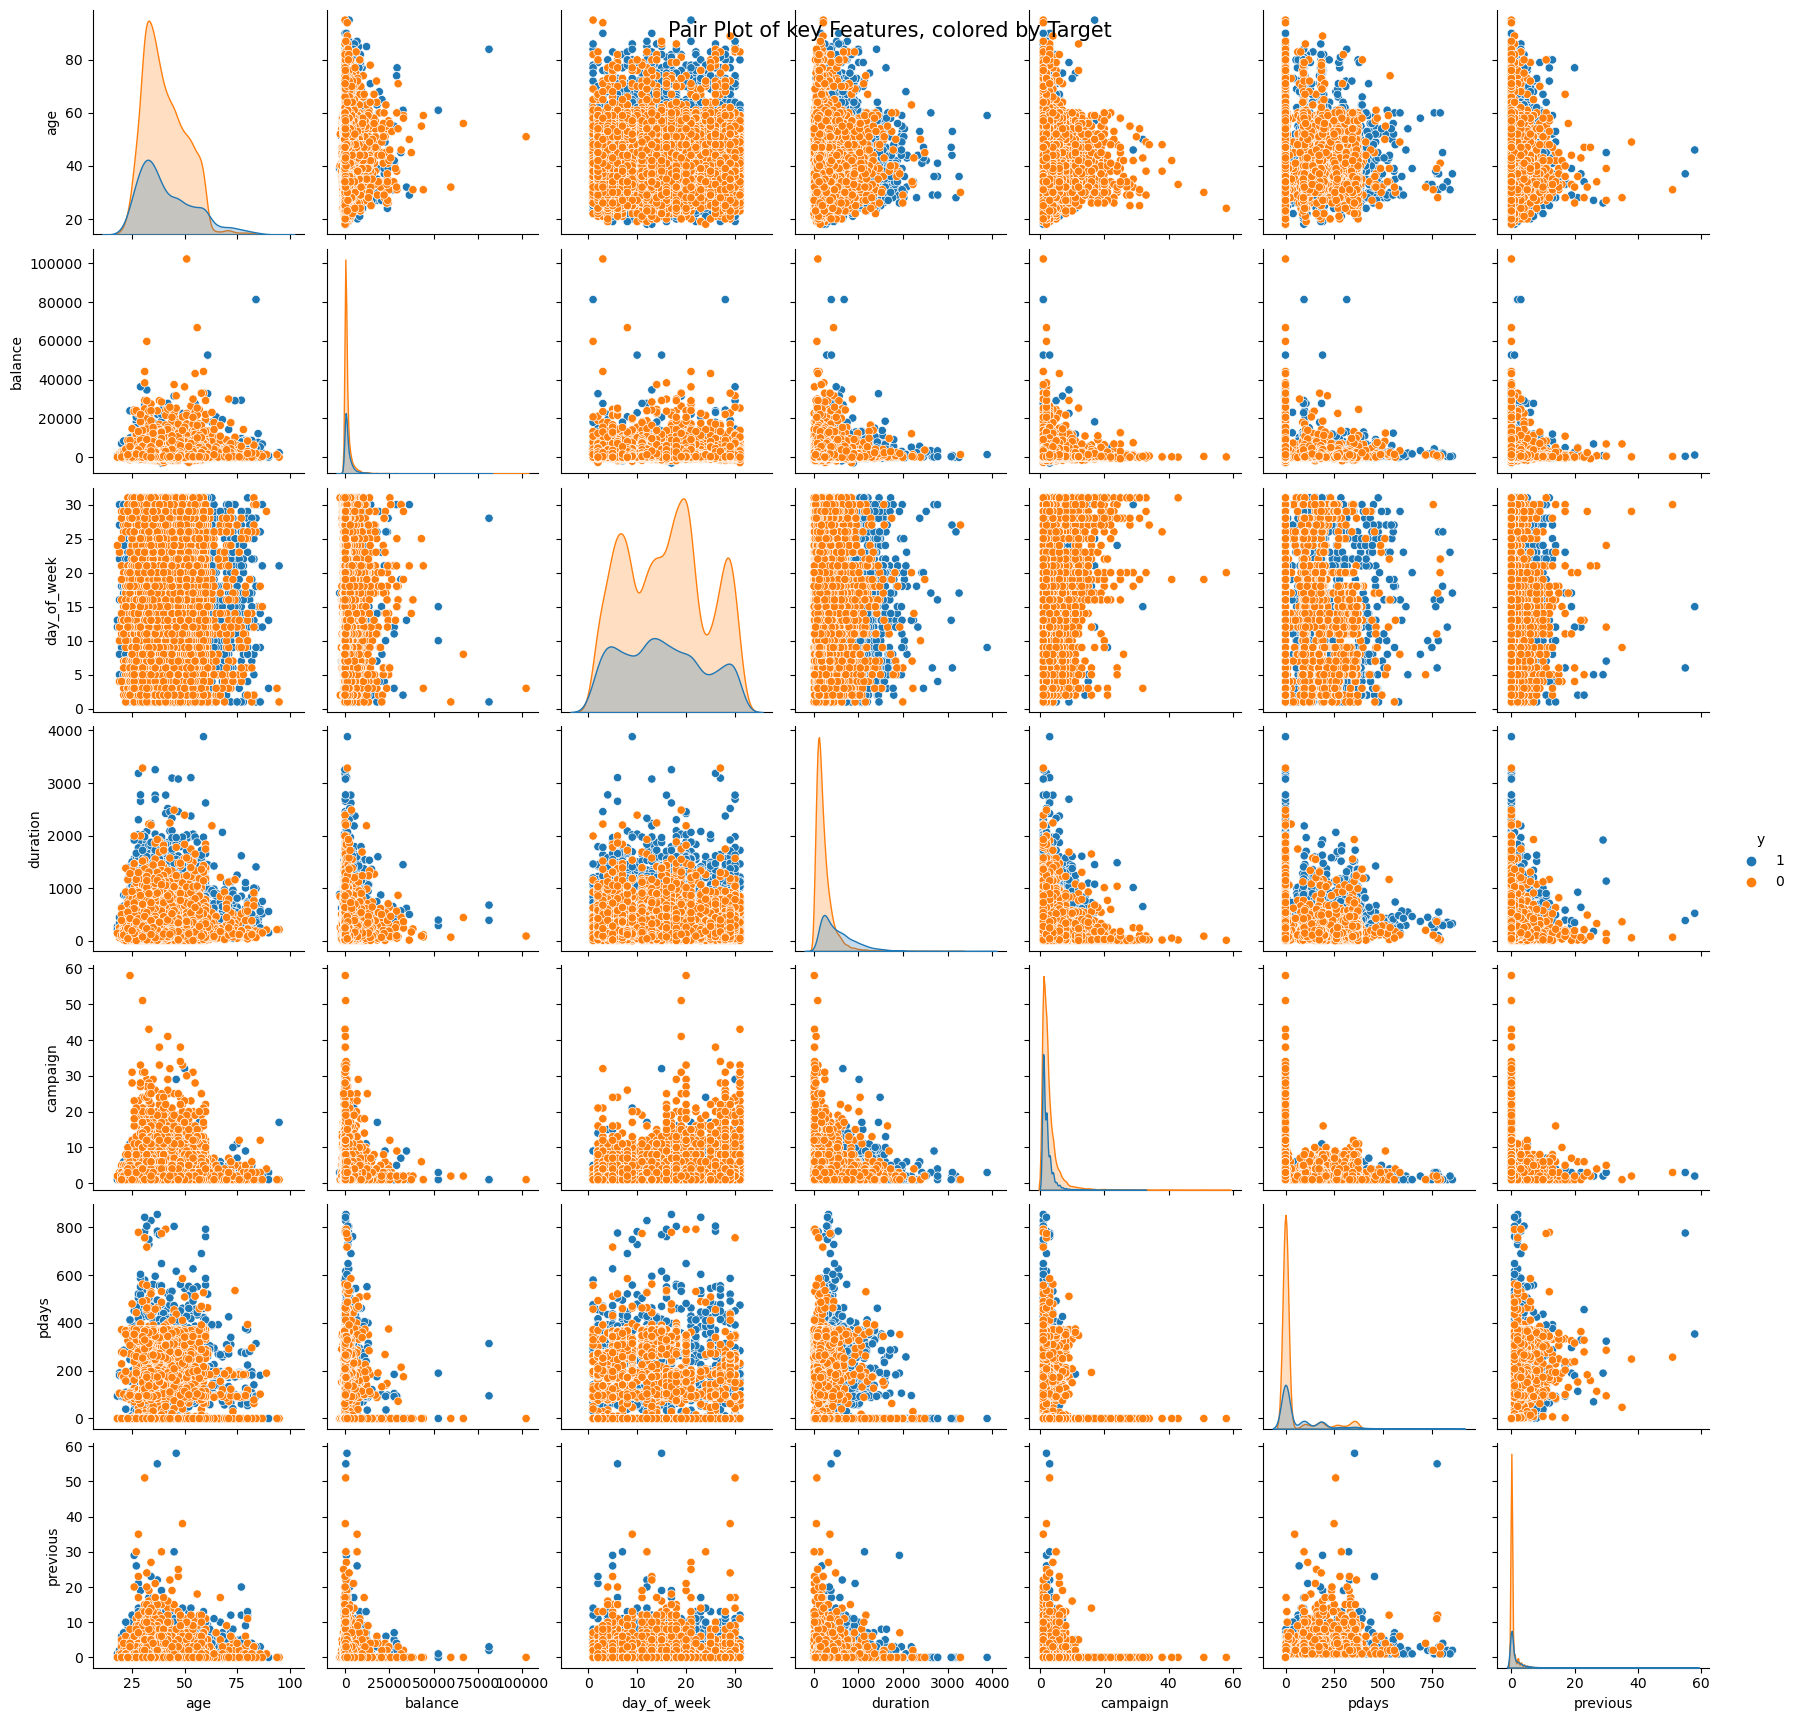

In [103]:
# Create a pair plot
sns.pairplot(df_plot, hue='y', height=2.5)
plt.suptitle('Pair Plot of key Features, colored by Target', size=15)
#plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3)
plt.show()

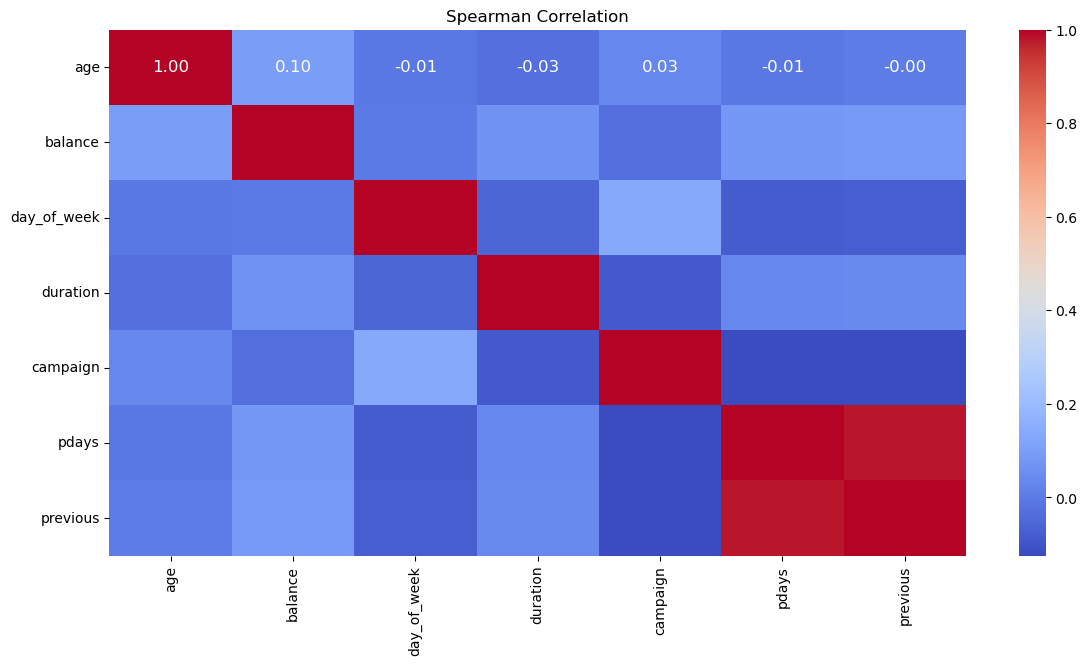

In [104]:
# Visualize correlations among numericvariables

# Calculate correlation matrix (Pearson and Spearman)
correlation_matrix_spearman = df_plot[numerical_features].corr(method='spearman')

# Plot heatmap
plt.figure(figsize=(12, 6))

# Heatmap for Spearman correlations
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})
plt.title('Spearman Correlation')

# Adjust layout to prevent overlap
plt.tight_layout()

# Rotate x-axis tick labels to 90 degrees
plt.xticks(rotation=90)

# Show plot
plt.show()

In [105]:
categorical_features

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'month'], dtype='object')

In [106]:
numerical_features

Index(['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous'],
      dtype='object')

In [107]:
# RESET THE INDEX
#Display the original DataFrame
print("Original DataFrame:")
print(df_cleaned)

# Reset index and drop the old index
df = df_cleaned.reset_index(drop=True)

# Display the DataFrame after resetting index
print("\nDataFrame after resetting index and creating a new one:")
print(df)

Original DataFrame:
       age         job  marital  education default  balance housing loan  \
0       59      admin.  married  secondary      no     2343     yes   no   
1       56      admin.  married  secondary      no       45      no   no   
2       41  technician  married  secondary      no     1270     yes   no   
3       55    services  married  secondary      no     2476     yes   no   
4       54      admin.  married   tertiary      no      184      no   no   
...    ...         ...      ...        ...     ...      ...     ...  ...   
21149   34   housemaid  married  secondary      no      -97     yes  yes   
21150   57  management  married  secondary      no      262      no   no   
21152   43  technician  married  secondary      no      227     yes  yes   
21153   71     retired  married    primary      no        0      no   no   
21154   23     student   single    primary      no     1235      no   no   

       day_of_week month  duration  campaign  pdays  previous  y  


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17573 entries, 0 to 17572
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          17573 non-null  int64 
 1   job          17573 non-null  object
 2   marital      17573 non-null  object
 3   education    17573 non-null  object
 4   default      17573 non-null  object
 5   balance      17573 non-null  int64 
 6   housing      17573 non-null  object
 7   loan         17573 non-null  object
 8   day_of_week  17573 non-null  int64 
 9   month        17573 non-null  object
 10  duration     17573 non-null  int64 
 11  campaign     17573 non-null  int64 
 12  pdays        17573 non-null  int64 
 13  previous     17573 non-null  int64 
 14  y            17573 non-null  string
dtypes: int64(7), object(7), string(1)
memory usage: 2.0+ MB


***Business Objective:*** In the competitive banking sector, optimizing marketing strategies is crucial for enhancing profitability and customer engagement. This study evaluated data from a Portuguese bank’s direct marketing campaigns, where phone calls were used to promote term deposits. The goal was to analyze client interactions and campaign outcomes to refine marketing efforts and boost term deposit subscriptions.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [109]:
# Rename day_of_week to day_of_month
df.rename(columns={'day_of_week': 'day_of_month'}, inplace=True)

# Encode the categorical variables and standardize the numeric variables

# Separate features and target variable
X = df.drop(columns='y')
y = df['y']

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first', sparse=False), categorical_cols)
    ])

# Apply transformations
X_preprocessed = preprocessor.fit_transform(X)

# Convert the result back to a DataFrame
# Get feature names for the transformed data
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
num_feature_names = numeric_cols
all_feature_names = num_feature_names + list(cat_feature_names)

# Create DataFrame with preprocessed data
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=all_feature_names)

# Display the transformed data
print(X_preprocessed_df.head())

# Print the list of columns
columns_list = X_preprocessed_df.columns.tolist()
print("\nList of columns in the DataFrame:")
print(columns_list)

# Display the shape of the preprocessed data
print("\nShape of preprocessed X:", X_preprocessed_df.shape)
print("\nShape of y data:", y.shape)


        age   balance  day_of_month  duration  campaign     pdays  previous  \
0  1.639038  0.292329     -1.279502  2.352541 -0.573184 -0.444897 -0.333689   
1  1.368367 -0.441952     -1.279502  3.722014 -0.573184 -0.444897 -0.333689   
2  0.015012 -0.050527     -1.279502  3.470675 -0.573184 -0.444897 -0.333689   
3  1.278144  0.334827     -1.279502  0.860621 -0.573184 -0.444897 -0.333689   
4  1.187920 -0.397538     -1.279502  1.163516 -0.225326 -0.444897 -0.333689   

   job_blue-collar  job_entrepreneur  job_housemaid  ...  month_dec  \
0              0.0               0.0            0.0  ...        0.0   
1              0.0               0.0            0.0  ...        0.0   
2              0.0               0.0            0.0  ...        0.0   
3              0.0               0.0            0.0  ...        0.0   
4              0.0               0.0            0.0  ...        0.0   

   month_feb  month_jan  month_jul  month_jun  month_mar  month_may  \
0        0.0        0.0    

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [110]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed_df, y, test_size=0.25, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(13179, 35) (4394, 35) (13179,) (4394,)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [81]:
# Accuracy of the most frequent class
baseline_accuracy = y.value_counts(normalize=True).max()
print(f"Baseline accuracy: {baseline_accuracy:.2f}")


Baseline accuracy: 0.71


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [82]:
# Initialize logistic regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Evaluate model performance (optional)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the full Logistic Regression model: {accuracy:.2f}")

Accuracy of the full Logistic Regression model: 0.83


### Problem 9: Score the Model

What is the accuracy of your model?

The accuracy of our Model is ***83%***.

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [83]:
# Define the models minus their parameter grids
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC()
}

results = []

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    results.append({
        "Model": name,
        "Train Time": train_time,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy
    })

results_df = pd.DataFrame(results)
print(results_df)


                 Model  Train Time  Train Accuracy  Test Accuracy
0  Logistic Regression    0.042997        0.824176       0.826236
1                  KNN    0.009999        0.869658       0.823489
2        Decision Tree    0.085830        1.000000       0.782738
3                  SVM    1.997426        0.872405       0.846154


***Summary of default models:***<br>

* ***Accuracy vs. Overfitting:***
Decision Tree shows the highest risk of overfitting with perfect training accuracy but lower test accuracy.
KNN also has some overfitting but to a lesser extent than Decision Trees.
Logistic Regression and SVM balance training and test accuracies well, indicating better generalization with minimal overfitting.

* ***Train Time vs. Performance:***
Decision Trees and KNN are the fastest to train, but they may suffer from overfitting.
Logistic Regression offers a good balance between training time and performance.
SVM, while slower to train, provides the best balance of accuracy and generalization, making it suitable for situations where training time is less critical compared to achieving high accuracy.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [111]:
# Re-fit the Models, considering Hyperparameter tuning


# Define models and their parameter grids
models = {
    'KNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
    'Logistic Regression': (LogisticRegression(max_iter=1000), {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2', 'none'],
        'solver': ['liblinear']  # 'liblinear' is compatible with 'l1' and 'l2'
    }),
    'Decision Tree': (DecisionTreeClassifier(), {
        'max_depth': [None, 2, 3, 4, 5, 6, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }),
    'Support Vector Machines': (SVC(probability=True), {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10]  # gamma values for rbf kernel
    })
}

results = []

# Evaluate each model
for model_name, (model, params) in models.items():
    # Initialize grid search with cross-validation
    grid_search = GridSearchCV(model, params, cv=5, return_train_score=False, n_jobs=-1)
    
    # Fit the model and measure time
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    fit_time = time.time() - start_time
    
    # Get the best estimator and parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_cvscore = grid_search.best_score_

    # Predictions
    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)
    
    # Calculate scores
    train_score = accuracy_score(y_train, y_pred_train)
    test_score = accuracy_score(y_test, y_pred_test)
    
    # Classification report and confusion matrix
    train_report = classification_report(y_train, y_pred_train, output_dict=True)
    test_report = classification_report(y_test, y_pred_test, output_dict=True)
    
    # ROC-AUC Score
    y_prob_test = best_model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_prob_test)
    
    # Store results
    results.append({
        'Model': model_name,
        'Train Time': round(fit_time, 2),        
        'Train Accuracy': round(train_score, 2),
        'Test Accuracy': round(test_score, 2),
        'ROC_AUC': round(roc_auc, 2)
    })
    
    print(f"Model: {model_name}")
    print(f"Train Accuracy: {train_score:.4f}")
    print(f"Test Accuracy: {test_score:.4f}")
    print(f"ROC-AUC Score: {roc_auc:.4f}")
    print(f"Fit Time: {fit_time:.4f} seconds")
    print(f"Best CV score: {best_cvscore:.4f}")
    print(f"Best Parameters: {best_params}")
    print(f"Classification Report (Test):\n{classification_report(y_test, y_pred_test)}")
    print(f"Confusion Matrix (Test):\n{confusion_matrix(y_test, y_pred_test)}\n\n")

# Print results summary
results_df = pd.DataFrame(results)
print("Summary of Results:")
print(results_df)


Model: KNN
Train Accuracy: 0.8740
Test Accuracy: 0.8229
ROC-AUC Score: 0.8650
Fit Time: 2.0882 seconds
Best CV score: 0.8232
Best Parameters: {'n_neighbors': 5}
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      3147
           1       0.72      0.61      0.66      1247

    accuracy                           0.82      4394
   macro avg       0.79      0.76      0.77      4394
weighted avg       0.82      0.82      0.82      4394

Confusion Matrix (Test):
[[2856  291]
 [ 487  760]]


Model: Logistic Regression
Train Accuracy: 0.8251
Test Accuracy: 0.8259
ROC-AUC Score: 0.8950
Fit Time: 0.5063 seconds
Best CV score: 0.8243
Best Parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      3147
           1       0.74      0.59      0.66      1247

    accuracy             

**Model Evaluation** <br>
**1. Support Vector Machines (SVM):**
* **Strengths:** Highest ROC-AUC score (0.92), indicating the best ability to discriminate between classes. High test accuracy (0.85) and balanced performance across classes.
* **Weaknesses:** Very high training time (2542.27 seconds), which could be impractical for large datasets or frequent retraining.

**2. K-Nearest Neighbors (KNN):**<br>
* **Strengths:** Good ROC-AUC score (0.87) and reasonable test accuracy (0.82). Decent balance between precision and recall, with relatively shorter training time (2.09 seconds).
* **Weaknesses:** Lower test accuracy compared to SVM and slightly less effective in handling class imbalance (lower recall for the positive class).

**3. Logistic Regression:**<br>
* **Strengths:** Competitive ROC-AUC score (0.89) and test accuracy (0.83). Moderate training time (0.51 seconds) and simple interpretability.
* **Weaknesses:** Slightly lower performance in ROC-AUC compared to SVM, with similar issues in recall for the positive class.

**4. Decision Tree:**<br>
* **Strengths:** Reasonable ROC-AUC score (0.86) and test accuracy (0.83). Moderate training time (1.01 seconds).
* **Weaknesses:** Lower ROC-AUC compared to SVM and Logistic Regression. The model can also be prone to overfitting, especially if not tuned properly.

**Best Model Choice:**<br>
Support Vector Machines (SVM) is the best model overall based on the following considerations:

* **ROC-AUC Score:** Highest, which indicates the best performance in distinguishing between classes.
* **Test Accuracy:** High at 0.85, reflecting overall good performance.
* **Class Balance:** SVM has balanced precision and recall for both classes, showing robust performance across the board.

**Trade-offs:**<br>
* **Training Time:** SVM has a significantly longer training time compared to the other models. This is a critical factor if the model needs to be retrained frequently or in case of large datasets.
* **Complexity:** SVMs are more complex to tune and interpret compared to simpler models like Logistic Regression or Decision Trees.

**Conclusion:**<br>
SVM is the best choice, however, for faster training times, interpretability and reasonable performance, Logistic Regression is more practical. 

## FINAL MODEL: LOGISTIC REGRESSION

# use decision trees to explore interactions to use in logistic regression

Training Accuracy: 0.81
Test Accuracy: 0.81


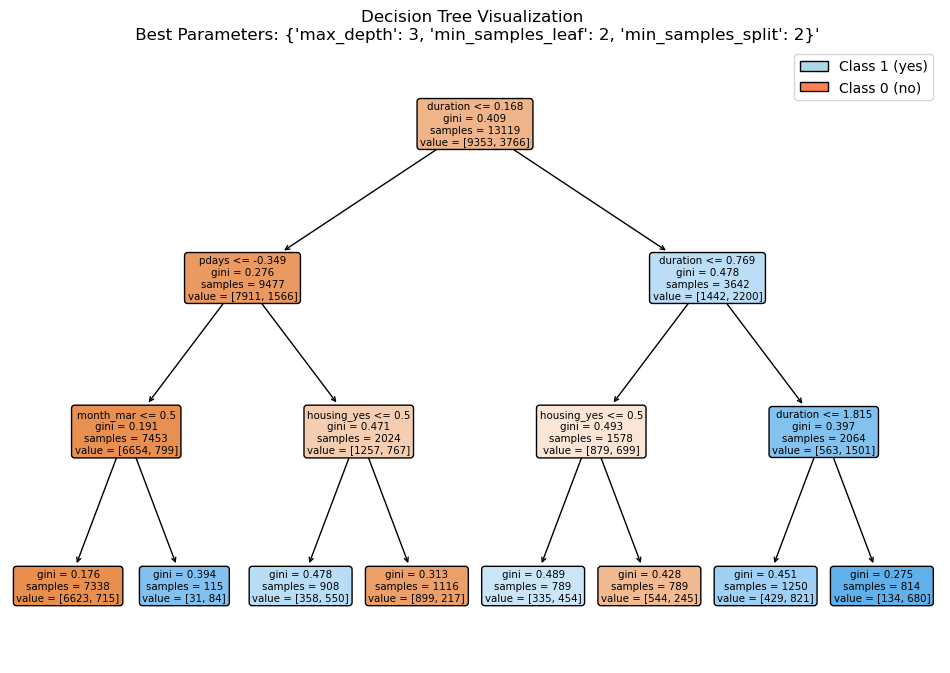

|--- duration <= 0.17
|   |--- pdays <= -0.35
|   |   |--- month_mar <= 0.50
|   |   |   |--- class: 0
|   |   |--- month_mar >  0.50
|   |   |   |--- class: 1
|   |--- pdays >  -0.35
|   |   |--- housing_yes <= 0.50
|   |   |   |--- class: 1
|   |   |--- housing_yes >  0.50
|   |   |   |--- class: 0
|--- duration >  0.17
|   |--- duration <= 0.77
|   |   |--- housing_yes <= 0.50
|   |   |   |--- class: 1
|   |   |--- housing_yes >  0.50
|   |   |   |--- class: 0
|   |--- duration >  0.77
|   |   |--- duration <= 1.82
|   |   |   |--- class: 1
|   |   |--- duration >  1.82
|   |   |   |--- class: 1



In [42]:
# Best Parameters: {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}

X = X_preprocessed_df

# Initialize the Decision Tree Classifier with specified hyperparameters
dtree = DecisionTreeClassifier(
    max_depth=3, # pruned to 3 from 6 
    min_samples_leaf=2, 
    min_samples_split=2,
    random_state=42
)

# Fit the model to the training data
dtree.fit(X_train, y_train)


# Predict on training data
y_train_pred = dtree.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on test data
y_test_pred = dtree.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')



import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dtree, feature_names=X.columns, filled=True, rounded=True)
plt.title("Decision Tree Visualization \n Best Parameters: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}'")

# Manually add a legend
# Define colors based on the class labels
from matplotlib.patches import Patch

# Define the colors to use for the legend
legend_elements = [
    Patch(facecolor='lightblue', edgecolor='black', label='Class 1 (yes)'),
    Patch(facecolor='coral', edgecolor='black', label='Class 0 (no)')
]

# Create the legend
plt.legend(handles=legend_elements, loc='best')

# Save the plot
save_path = r'C:\Users\Luswata\Dropbox\ML_AI_UCBerkeley\MODULE_17_Practical3\decision_tree.png'
plt.savefig(save_path)

plt.show()


# Export and print the text version of the tree
tree_text = export_text(dtree, feature_names=X.columns.tolist())
print(tree_text)


Below are the summarized rules of the decision tree (based on standardized numeric features):

1. **If `duration` ≤ 0.17**:
   - **If `pdays` ≤ -0.35**:
     - **If `month_mar` ≤ 0.50**: Predict **class 0**.
     - **If `month_mar` > 0.50**: Predict **class 1**.
   - **If `pdays` > -0.35**:
     - **If `housing_yes` ≤ 0.50**: Predict **class 1**.
     - **If `housing_yes` > 0.50**: Predict **class 0**.

2. **If `duration` > 0.17**:
   - **If `duration` ≤ 0.77**:
     - **If `housing_yes` ≤ 0.50**: Predict **class 1**.
     - **If `housing_yes` > 0.50**: Predict **class 0**.
   - **If `duration` > 0.77**:
     - **If `duration` ≤ 1.82**: Predict **class 1**.
     - **If `duration` > 1.82**: Predict **class 1**.

**Summary:**
- The model generally predicts **class 1 (term deposit subscriptions)** for longer call durations.
- Short call durations (≤ 0.17) are classified based on `pdays` and `month_mar`.
- Longer call durations (> 0.17) are classified based on `housing_yes` and further split by `duration`.

- The tree identified the features; `duration`, `pdays`, `month_mar` and `housing_yes`  whose interaction patterns need further investigation in the logistic regression model.

# Add interactions to X_train

In [194]:
df = df_cleaned.reset_index(drop=True)
df.rename(columns={'day_of_week': 'day_of_month'}, inplace=True)

df = pd.get_dummies(df, drop_first=True)

# Identify categorical columns excluding 'y' to encode
#categorical_cols = df.select_dtypes(include=['object']).columns
#if 'y' in categorical_cols:
#    categorical_cols = categorical_cols.drop('y')

# Apply one-hot encoding
#df_1 = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df.rename(columns={'y_1': 'y'}, inplace=True)

print(df.columns)
print(df.info())

Index(['age', 'balance', 'day_of_month', 'duration', 'campaign', 'pdays',
       'previous', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'education_secondary', 'education_tertiary',
       'default_yes', 'housing_yes', 'loan_yes', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'y'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17573 entries, 0 to 17572
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  17573 non-null  int64
 1   balance              17573 non-null  int64
 2   day_of_month         17573 non-null  int64
 3   duration             17573 non-null  in

In [195]:
# Add interaction terms from DTs
df['duration_pdays'] = df['duration'] * df['pdays']
df['duration_mmar'] = df['duration'] * df['month_mar']
df['month_mar_pdays'] = df['month_mar'] * df['pdays']
df['duration_pdays_mmar'] = df['duration'] * df['pdays'] * df['month_mar']
df['duration_hous'] = df['duration'] * df['housing_yes']

df

,age,balance,day_of_month,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_may,month_nov,month_oct,month_sep,y,duration_pdays,duration_mmar,month_mar_pdays,duration_pdays_mmar,duration_hous
0,59,2343,5,1042,1,-1,0,False,False,False,...,True,False,False,False,True,-1042,0,0,0,1042
1,56,45,5,1467,1,-1,0,False,False,False,...,True,False,False,False,True,-1467,0,0,0,0
2,41,1270,5,1389,1,-1,0,False,False,False,...,True,False,False,False,True,-1389,0,0,0,1389
3,55,2476,5,579,1,-1,0,False,False,False,...,True,False,False,False,True,-579,0,0,0,579
4,54,184,5,673,2,-1,0,False,False,False,...,True,False,False,False,True,-673,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17568,34,-97,8,119,2,-1,0,False,False,True,...,False,False,False,False,False,-119,0,0,0,119
17569,57,262,25,276,1,-1,0,False,False,False,...,False,False,False,False,False,-276,0,0,0,0
17570,43,227,19,124,2,-1,0,False,False,False,...,False,False,False,False,False,-124,0,0,0,124
17571,71,0,16,246,3,-1,0,False,False,False,...,False,False,False,True,False,-246,0,0,0,0


In [196]:
# Separate features and target variable
X = df.drop(columns='y')
y = df['y']

In [197]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(13179, 40) (4394, 40) (13179,) (4394,)


# Using Permutation Importance to reduce the number of features

In [198]:
# Initialize logistic regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Evaluate model performance (optional)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of full Logistic Regression model: {accuracy}")

Accuracy of full Logistic Regression model: 0.7933545744196632


In [199]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Get the indices of feature importance in descending order
sorted_idx = perm_importance.importances_mean.argsort()[::-1]

# Print feature importance
for i in sorted_idx:
    print(f"{X.columns[i]}: {perm_importance.importances_mean[i]:.4f}")


duration: 0.1591
duration_mmar: 0.0107
duration_hous: 0.0105
duration_pdays: 0.0076
pdays: 0.0062
age: 0.0038
duration_pdays_mmar: 0.0004
month_mar_pdays: 0.0002
month_oct: 0.0000
marital_married: 0.0000
month_sep: 0.0000
previous: 0.0000
job_blue-collar: 0.0000
job_entrepreneur: 0.0000
job_housemaid: 0.0000
job_management: 0.0000
job_retired: 0.0000
job_self-employed: 0.0000
job_services: 0.0000
job_student: 0.0000
job_technician: 0.0000
month_nov: 0.0000
job_unemployed: 0.0000
marital_single: 0.0000
month_feb: 0.0000
month_may: 0.0000
month_mar: 0.0000
month_jun: 0.0000
month_jul: 0.0000
education_tertiary: 0.0000
month_jan: 0.0000
month_dec: 0.0000
month_aug: 0.0000
loan_yes: 0.0000
housing_yes: 0.0000
default_yes: 0.0000
education_secondary: 0.0000
campaign: -0.0002
day_of_month: -0.0012
balance: -0.0012


In [200]:
# Number of top features to keep
k = 12

# Select the top k features
selected_features = X_train.columns[sorted_idx][:k]

X_selected = X_train[selected_features]

print(f"Selected features: {selected_features}")

Selected features: Index(['duration', 'duration_mmar', 'duration_hous', 'duration_pdays', 'pdays',
       'age', 'duration_pdays_mmar', 'month_mar_pdays', 'month_oct',
       'marital_married', 'month_sep', 'previous'],
      dtype='object')


In [201]:
#Update selected_features list
selected_features = [
    'duration', 'duration_mmar', 'duration_hous', 'duration_pdays', 'pdays',
    'age', 'duration_pdays_mmar', 'month_mar_pdays', 'month_oct',
    'marital_married', 'month_sep', 'previous',
    'month_mar', 'housing_yes'  
]

In [202]:
# Select only the features in selected_features
X_train_filtered = X_train[selected_features]
X_test_filtered = X_test[selected_features]

print(X_train.shape, X_train_filtered.shape, X_test.shape, X_test_filtered.shape)


(13179, 40) (13179, 14) (4394, 40) (4394, 14)


In [203]:
# update X_train to ensure all selected features are present in X_train
missing_features = [feature for feature in selected_features if feature not in X_train.columns]
if missing_features:
    raise ValueError(f"Missing features in X_train: {missing_features}")

# Select only the features in selected_features
X_train_filtered = X_train[selected_features]
X_test_filtered = X_test[selected_features]

print(X_train.shape, X_train_filtered.shape, X_test.shape, X_test_filtered.shape)


(13179, 40) (13179, 14) (4394, 40) (4394, 14)


In [204]:
# Update X_train, X_test
X_train = X_train_filtered
X_test = X_test_filtered

In [205]:
# Define the pipeline steps with L2 regularization
steps = [
    ('scaler', StandardScaler()),    # Step 1: StandardScaler
    ('logreg', LogisticRegression(C=10, penalty='l1', max_iter=1000, solver='liblinear', random_state=42))  # Step 2: LogisticRegression with L2 regularization
]

# Create the pipeline
pipeline = Pipeline(steps)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegression(C=10, max_iter=1000, penalty='l1',
                                    random_state=42, solver='liblinear'))])

In [206]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Extract the logistic regression model from the pipeline
logistic_regression_model = pipeline.named_steps['logreg']

# Extract the StandardScaler from the pipeline
scaler = pipeline.named_steps['scaler']

# Transform X_selected using the scaler
X_scaled = scaler.transform(X_train)

# Extracting coefficient estimates, standard errors, z-scores, p-values, and confidence intervals
coef = logistic_regression_model.coef_[0]
std_err = np.sqrt(np.diag(np.linalg.inv(X_scaled.T @ X_scaled)))  # Standard errors using the inverse of (X'X)
z_scores = coef / std_err
p_values = 2 * (1 - norm.cdf(np.abs(z_scores)))
conf_int = np.column_stack((coef - 1.96 * std_err, coef + 1.96 * std_err))

# Calculate odds ratios
odds_ratios = np.exp(coef)

# Retrieve feature names
feature_names = X_train.columns

# Calculate model equation including intercept
intercept = logistic_regression_model.intercept_[0]
model_equation = f"log(p / (1 - p)) = {intercept:.4f} + " + \
                " + ".join([f"({coef[i]:.4f} * {feature_names[i]})" for i in range(len(coef))])

# Calculate log-likelihood (useful for logistic regression)
log_likelihood = logistic_regression_model.score(X_scaled, y_train)  # This computes the mean accuracy

# Number of observations (N)
N = X_train.shape[0]

# Likelihood ratio chi-squared (LR chi2) and its p-value
from scipy.stats import chi2

LR_chi2 = 2 * log_likelihood * N  # Likelihood ratio statistic
prob_chi2 = chi2.sf(LR_chi2, len(coef))  # p-value associated with LR chi2

# Log-Likelihood of the fitted model
llf = model_sm.llf
# Log-Likelihood of the null model
llnull = model_sm.llnull
# McFadden’s R-squared
pseudo_R2 = 1 - (llf / llnull)


# Hosmer-Lemeshow Goodness-of-fit test
from sklearn.calibration import calibration_curve

# Predict probabilities on the training set
y_pred_prob = pipeline.predict_proba(X_train)[:, 1]

# Calculate observed and expected frequencies
observed_prob, predicted_prob = calibration_curve(y_train, y_pred_prob, n_bins=10, strategy='uniform')
observed_freq = np.histogram(y_pred_prob, bins=10)[0]
expected_freq = predicted_prob * observed_freq.sum()

# Compute Hosmer-Lemeshow chi-squared statistic
HL_chi2 = ((observed_freq - expected_freq) ** 2 / expected_freq).sum()

# Degrees of freedom for the Hosmer-Lemeshow test
df = 10 - 2  # 10 deciles minus 2 parameters (intercept and slope)

# Compute p-value using chi2 distribution
HL_p_value = chi2.sf(HL_chi2, df)

# Print all the computed statistics
print("Parameter Estimates:")
param_df = pd.DataFrame({'Feature': feature_names, 'Coef.': coef, 'ORs.': odds_ratios, 'Std. Err.': std_err, 'Z': z_scores, 'p > |Z|': p_values,
                         '95% CI (lower)': conf_int[:, 0], '95% CI (upper)': conf_int[:, 1]})
print(param_df.to_string(index=False))  # Print parameter estimates table without index

print("\nModel Equation:\n", model_equation)
print("\nLog-Likelihood:", log_likelihood)
print("Number of Observations (N):", N)
print("LR Chi-squared:", LR_chi2)
print("Prob > Chi-squared:", prob_chi2)
print("Pseudo R-squared (McFadden's R-squared):", pseudo_R2)
print("\nHosmer-Lemeshow Test:")
print(f"HL Chi-squared: {HL_chi2:.4f}")
print(f"HL Degrees of Freedom: {df}")
print(f"HL p-value: {HL_p_value:.4f}")


Parameter Estimates:
            Feature     Coef.     ORs.  Std. Err.          Z      p > |Z|  95% CI (lower)  95% CI (upper)
           duration  1.311501 3.711741   0.013558  96.731576 0.000000e+00        1.284927        1.338075
      duration_mmar  0.100923 1.106192   0.012586   8.018696 1.110223e-15        0.076255        0.125592
      duration_hous  0.272731 1.313547   0.016045  16.997985 0.000000e+00        0.241283        0.304179
     duration_pdays -0.035583 0.965042   0.013459  -2.643907 8.195517e-03       -0.061962       -0.009204
              pdays  0.338807 1.403272   0.014192  23.873349 0.000000e+00        0.310991        0.366623
                age  0.015957 1.016085   0.009319   1.712221 8.685592e-02       -0.002309        0.034223
duration_pdays_mmar  0.029188 1.029619   0.019614   1.488133 1.367159e-01       -0.009255        0.067632
    month_mar_pdays -0.083323 0.920054   0.020238  -4.117113 3.836472e-05       -0.122990       -0.043656
          month_oct  0.26

Accuracy: 0.8161
Precision: 0.7459
Recall: 0.5402
F1-score: 0.6266
ROC-AUC: 0.8736

Classification Report:
              precision    recall  f1-score   support

       False       0.83      0.93      0.88      3139
        True       0.75      0.54      0.63      1255

    accuracy                           0.82      4394
   macro avg       0.79      0.73      0.75      4394
weighted avg       0.81      0.82      0.81      4394



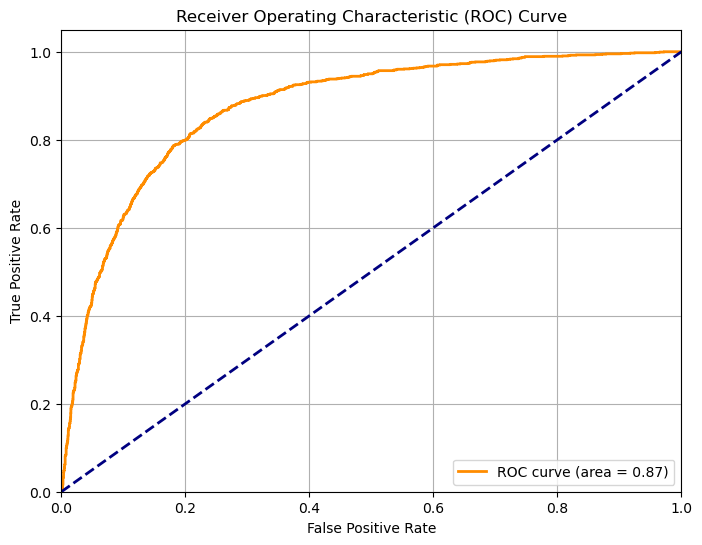

[[2908  231]
 [ 577  678]]


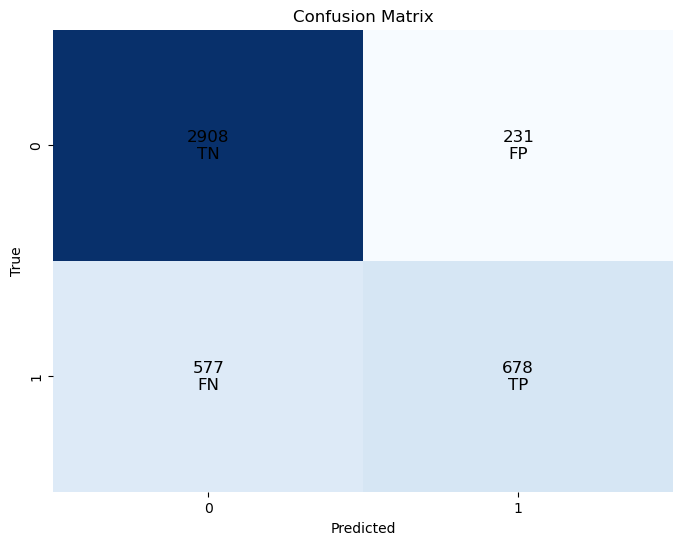

In [207]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

# Predictions on the test set
y_pred = pipeline.predict(X_test)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1])  # Use predict_proba for ROC-AUC

# Display the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pipeline.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Plot confusion matrix with TP, FP, TN, FN labels inside cells
print(confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=False, cmap='Blues', cbar=False, annot_kws={"size": 16})  # Use 'fmt=d' for integer display

# Label True Positives and False Positives inside cells
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{cm[i, j]}\n{['TN', 'FP', 'FN', 'TP'][i * cm.shape[1] + j]}",
                 ha='center', va='center', fontsize=12, color='black')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


**Interpretation**

***Coefficients & Odds Ratios:***<br>
* **Duration:** A one-unit increase in duration is associated with a 3.71-fold increase in the odds of subscription to a term deposit.<br>
* **Housing** Having a housing loan decreases the odds of subscribing to a term deposit by 56%.<br>
  
**Statistical Significance:**
All features are statistically significant (p < 0.05) except age and interaction of duration_pdays_mmar, which have p-values slightly above 0.05.

**Model Fit:**
* **LR Chi-squared** is very high, and the p-value indicates a significant model fit compared to a null model. The Pseudo R-squared (McFadden’s) of 0.354 suggests that the model explains approximately 35.4% of the variance in the outcome variable.

* **Hosmer-Lemeshow Test:** The high Chi-squared value and the low p-value indicate that there may be issues with the goodness-of-fit of the model. The model does not fit the data perfectly. 

**Overall Summary**<br>
* **Strengths:** The model shows good overall performance with a high ROC-AUC score (87.4%), indicating strong discriminative ability. Precision for the non-subscribers class is high, which is good for identifying non-subscribers accurately.<br>
* **Weaknesses:** The recall for the subscribers class is lower, meaning the model misses a considerable proportion of actual subscribers. This may be important if the goal is to identify as many subscribers as possible, even if it means accepting some false positives.

**Conclusion**
The model can be adjusted through feature engineering; including new or previously dropped features or excluding specific features, balancing the classes further and/or more hyperparameters tuning in order to improve the model fit and performance.






##### Questions